In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
from collections import Counter

Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

!mkdir data
!tar -xf inno_stats.tar.gz -C ./data

In [ ]:
g_9 = pd.read_csv('./inno_stats/09_groups.csv')
g_9.head()

In [ ]:
g_10 = pd.read_csv('./inno_stats/10_groups.csv')
g_10.head()

In [ ]:
g_11 = pd.read_csv('./inno_stats/11_groups.csv')
g_11.head()

In [ ]:
p_g = pd.read_csv('./inno_stats/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [ ]:
import pandas as pd


import matplotlib.pyplot as plt
bad_ids = pd.read_csv('./inno_stats/bad_ids - bad_ids.csv.csv')['id_card'].values

df = pd.read_csv('./inno_stats/09_groups.csv')
df = df[~df['id_card'].isin(bad_ids)]

Common buyers

In [4]:


common_buyers = Counter(df['id_card']).most_common()

In [5]:
common_buyers[:10]

[(1243870, 707),
 (1137696, 640),
 (5959, 620),
 (230546, 559),
 (784759, 548),
 (542043, 543),
 (710070, 530),
 (1024720, 515),
 (1071249, 514),
 (307111, 511)]

$H_0$: buying discounted products depends on the average order sum

In [8]:


from scipy.stats import ttest_ind
green_sum = df.groupby("id_doc")['is_green'].sum()

green_cnt =green_sum.index[green_sum.to_numpy().nonzero()].tolist()
non_green_cnt = list(
    set(
        is_green_cnt.index
    ).difference(green_cnt))


In [7]:
a = green_sum[green_cnt]
b =green_sum[non_green_cnt]
ttest_ind(a, b)


Ttest_indResult(statistic=2511.536116022659, pvalue=0.0)

In [11]:
from scipy.stats import pearsonr
a = df.groupby("id_doc")['sum'].mean().tolist()
b =df.groupby("id_doc")['is_green'].sum().tolist()
pearsonr(b,a)

(-0.1212054098517056, 0.0)

Negative corrolation => reject null hypothesis

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

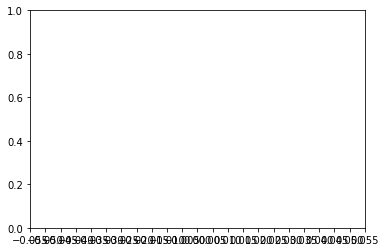

In [19]:
df.index = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M:%S')
day_cnts = df.groupby(by=[df.index.day])['id_doc'].count()
plt.locator_params(axis="x", nbins=31)


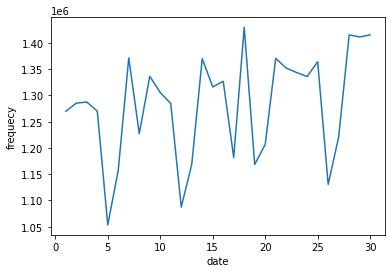

In [20]:
plt.xlabel('# of mo')
plt.ylabel('frequecy')
day_cnts.plot()

plt.show()

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly)
2. Average purchase sum - The customers that usually spend the same amount of money
3. Orders amount - The customers grouped by the total numer of orders
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea


### Frequent buyers

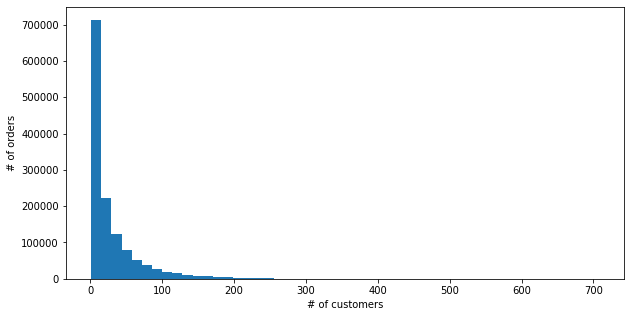

In [21]:
grouped_df = df.groupby('id_card')['id_doc'].count()

plt.figure(figsize=(10, 5))
plt.hist(grouped_df, bins=50)
plt.xlabel('# of customers')
plt.ylabel('# of orders');

### Average purchase sum

In [ ]:
grouped_df = df.groupby('id_card')['sum'].std()
grouped_df = grouped_df[grouped_df < 500]

plt.figure(figsize=(10, 5))
plt.xlabel('Sum of STDs')
plt.ylabel('#')
plt.hist(grouped_df, bins=50);

### Usual cart

In [ ]:
grouped_df = df.groupby('id_group')['id_card'].unique().apply(len).sort_values()[-50:]
plt.figure(figsize=(10, 5))
grouped_df.plot(kind='bar')
plt.ylabel('Count');